# 2. Machine Learning for Regression


Steps for creating a model for "Predicting Price of a car"

1. Data Preparation
2. EDA (Exploratory Data Analysis)
3. Use Linear Regression for price prediction (MSRP - Manufacturer Suggested Retail Price)
4. Understanding the internals of linear regression
5. Evaluating model with RMSE (root mean square error)
6. Feature engineering
7. Regularization
8. Using the model

In [11]:
import pandas as pd
import numpy as np

## 2.2 Data Preparation

In the data preparation phase, several important steps need to be followed to ensure the dataset is suitable for analysis and modeling. Here are some key considerations:

- *Data Cleaning*: This involves handling missing values, dealing with outliers, and ensuring consistency in data formats. Missing values can be imputed using various techniques, such as mean/median imputation or using advanced methods like K-nearest neighbors. Outliers may need to be addressed by either removing them or transforming them to fall within a reasonable range.
- *Data Integration*: If you have multiple datasets related to car prices, you may need to combine them into a single dataset. This can involve matching and merging records based on common identifiers or performing data joins based on shared attributes.
- *Data Transformation*: Sometimes, the existing variables may not be in a suitable format for analysis. In such cases, feature engineering techniques can be applied to create new variables that may have a better relationship with the target variable, such as transforming categorical variables into numerical ones using one-hot encoding or label encoding.
- *Feature Scaling*: It is crucial to make sure that the features are on a similar scale to avoid bias in the model. Common techniques for feature scaling include standardization (mean of 0 and standard deviation of 1) or normalization (scaling values between 0 and 1).
- *Train-Validation Split*: Before building the predictive model, it is essential to split the dataset into training and validating subsets. Typically, the majority of the data is used for training, while a smaller portion is reserved for evaluating the model’s performance. A train-validate-test split might provide more reliable results.
  
By following these steps diligently, one can ensure that the data is well-prepared and ready for the subsequent stages of the car price prediction project.

In [12]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [13]:
# wget is a free utility for non-interactive download of files from the web. It supports HTTP, HTTPS, and FTP protocols.
!wget $data

--2025-08-13 23:32:48--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.5’

data.csv.5          100%[===================>]   1.41M  --.-KB/s    in 0.04s   

2025-08-13 23:32:48 (34.6 MB/s) - ‘data.csv.5’ saved [1475504/1475504]



### Data Preparation - Car Price Prediction Project


#### Loading Data and get Overview

In [14]:
# Reading csv file after downloading
df = pd.read_csv('data.csv')

In [15]:
# Getting first overview of data
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [16]:
# There is some inconsistency in the naming of columns.
# There are underscores and capital letters present and absent in the names of columns
df["Transmission Type"] # works
# df.Transmission Type  doesn't work

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

#### Cleaning 
For consistency in columns, all column names have to be changes to lowercase and spaces are replaces with underscores.

In [17]:
# "columns" refers to the labels or names of the vertical axes in a DataFrame. 
# The DataFrame.columns attribute provides access to these column labels as a Pandas Index object.
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [18]:
# Vectorized string operation for index object
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [19]:
df.head()
# Column names are modified to same format

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [20]:
# Values in columns don't have a consistent format too, so they can be updated as above
# pd.dtypes returns a Series with the data type of each column.
# The result's index is the original DataFrame's columns. Columns with mixed types are stored with the ``object`` dtype
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [21]:
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [22]:
# Select columns of object datatype
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [23]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [24]:
# Get index of above and convert in list format
list(df.dtypes[df.dtypes == 'object'].index)

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [25]:
strings =  list(df.dtypes[df.dtypes == 'object'].index)

In [26]:
# Testing operation on one column
df['make'].str.lower().str.replace(' ','_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [27]:
#Updation is applied to all columns
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [28]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Key Points:

Pandas attributes and methods:

- pd.read_csv(<file_path_string>) -> read csv files
- df.head() -> take a look at the dataframe
- df.columns -> retrieve column names of a dataframe
- df.columns.str.lower() -> lowercase all the letters
- df.columns.str.replace(' ', '_') -> replace the space separator
- df.dtypes -> retrieve data types of all features
- df.index -> retrieve indices of a dataframe

## 2.3 Exploratory Data Analysis

Exploratory data analysis (EDA) is an essential step in the data analysis process. It involves summarizing and visualizing the main characteristics of a dataset to gain insights and identify patterns or trends. By exploring the data, researchers can uncover hidden relationships between variables and make informed decisions.

One common technique in EDA is to calculate summary statistics like mean, median, and standard deviation to understand the distribution of the data. These statistics provide a general overview of the dataset and can help identify potential outliers or unusual patterns.

Visualizations also play a crucial role in EDA. Graphical representations such as histograms, scatter plots, and box plots help visualize the data distribution, identify clusters or groups, and detect any unusual patterns or trends. Visualizations can be particularly helpful in identifying relationships between variables or finding patterns that may not be immediately apparent.

Another important aspect of EDA is data cleaning. This involves handling missing values, outliers, and inconsistencies in the dataset. By carefully examining the data, researchers can decide how to handle missing values (e.g., imputing or removing them) and identify and address outliers or errors.

EDA is not a one-time process but rather an iterative one. As researchers delve deeper into the data, they may uncover additional questions or areas of interest that require further exploration. Through this iterative process, researchers refine their understanding of the data and uncover valuable insights.

In conclusion, exploratory data analysis is a crucial step in the data analysis process. By summarizing, visualizing, and cleaning the data, researchers can uncover patterns, identify relationships, and make informed decisions. It provides the foundation for more advanced data analysis techniques and helps in the formation of hypotheses for further investigation.

In [29]:
df.columns.str.lower()

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

#### Getting Overview of Data

In [30]:
# Initial Analysis: Understanding values in each column for
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print("Number of unique values:", df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Number of unique values: 48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
Number of unique values: 914

year
[2011 2012 2013 1992 1993]
Number of unique values: 28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Number of unique values: 10

engine_hp
[335. 300. 230. 320. 172.]
Number of unique values: 356

engine_cylinders
[ 6.  4.  5.  8. 12.]
Number of unique values: 9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Number of unique values: 5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Number of unique values: 4

number_of_doors
[ 2.  4.  3. nan]
Number of unique values: 3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
Number of unique values: 71

vehicle_

#### Distribution of Price

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

 %matplotlib inline

* Functionality:
When %matplotlib inline is executed in a code cell, it sets the Matplotlib backend to render static images of plots directly below the code cell that generates them. This eliminates the need to explicitly call plt.show() to display the plots, although plt.show() can still be used.
* Benefits:
    - Inline Display:
Plots are embedded directly within the notebook, creating a self-contained and visually integrated document.
    - Improved Workflow:
Facilitates a smoother workflow for data analysis and visualization by allowing immediate viewing of plots after code execution.
    - Enhanced Readability:
Makes notebooks more readable and understandable by keeping code, explanations, and visualizations together.
    - Simplified Sharing:
Creates notebooks that are easier to share and reproduce, as external image files or separate windows are not required.

<Axes: xlabel='msrp', ylabel='Count'>

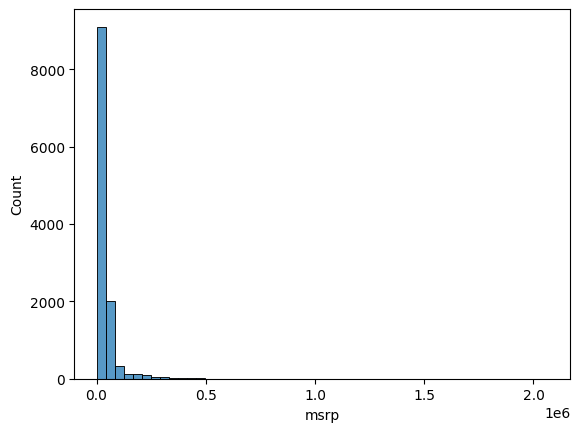

In [32]:
#bins: number of bars in histogram
#1e6 = 10^6 = 1000000
sns.histplot(df.msrp, bins=50)

There are a lot of prices that are pretty low but only a few cars that are very expensive. It means this is a long-tail distribution (many prices in a small range, but a few prices in a wide range). We need to zoom in a bit to “ignore” the long tail with too less datapoints.

<Axes: xlabel='msrp', ylabel='Count'>

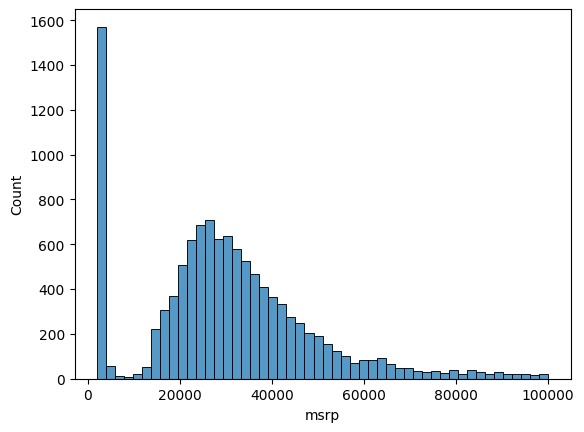

In [33]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

This kind of distribution (long tail and the peak) is not good for ML models, because this distribution will confuse the model. There is a way to get rid of the long tail by applying a logarithm to the price. This results in more compact values.

In [34]:
# Log can't be applied to 0, so 1 is added to all values to remove error
np.log([0,1,10,1000,100000])

/tmp/ipykernel_1894/764389357.py:2: RuntimeWarning: divide by zero encountered in log
  np.log([0,1,10,1000,100000])


array([       -inf,  0.        ,  2.30258509,  6.90775528, 11.51292546])

In [35]:
np.log([0+1,1+1,10+1,1000+1,100000+1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [36]:
# Built-in function that adds 1 before finding log
np.log1p([0,1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

<Axes: xlabel='msrp', ylabel='Count'>

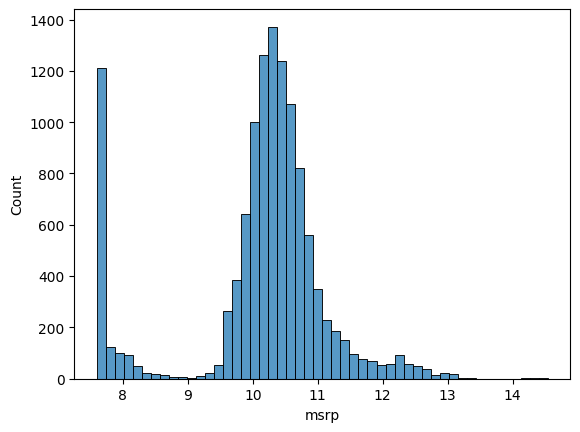

In [37]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

The long tail is no longer present, and you see a nice *bell curve* shape of a so-called *normal distribution*, which is ideal for ML models. But still there is the strange peak.

#### Misssing Values

In [30]:
#The sum function sums across columns and shows for each column how many missing values there are. This information is important when training a model.
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Key Points:


Pandas attributes and methods:

df[col].unique() -> return a list of unique values in the series
df[col].nunique() -> return the number of unique values in the series
df.isnull().sum() -> return the number of null values in the dataframe


Matplotlib and seaborn methods:

%matplotlib inline -> ensure that plots are displayed in Jupyter notebook's cells
sns.histplot() -> show the histogram of a series


Numpy methods:

np.log1p() -> apply log transformation to a variable, after adding one to each input value.
Long-tail distributions usually confuse the ML models, so the recommendation is to transform the target variable distribution to a normal one whenever possible.

## 2.4 Setting Up the Validation Framework

In general, the dataset is splitted into three parts: training, validation, and test. For each partition, we need to obtain feature matrices (X) and vectors of targets (y). First, the size of the partitions is calculated. Next, the records are shuffled to ensure that the values in the three partitions contain non-sequential records from the dataset. Finally, the partitions are created using the shuffled indices.

In [31]:
n = len(df)

# we train the model on the training dataset, check if it works fine on the validation dataset, and leave the test dataset for the end.  
# (train-val-test / 60-20-20).
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [32]:
n

11914

In [33]:
#Size of Dataframes
n_val, n_test, n_train

(2382, 2382, 7150)

In [34]:
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [35]:
df_train = df[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df[n_train + n_val:]
# This approach brings us to the problem that the records are sequential. 
# That’s a problem when there is an order in the dataset. 
# There's a need to shuffle; otherwise, there will be only  BMWs in one dataset.

In [36]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [37]:
# set a seed for reproducibility
np.random.seed(2)
np.random.shuffle(idx)

In [38]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [39]:
## Create shuffled datasets for training, validation, testing
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [40]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [41]:
len(df_train), len(df_test), len(df_val)

(7150, 2382, 2382)

In [42]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [43]:
#NO order in the index column, so reset the index and drop the old index column. 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [44]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [45]:
#  Apply the log1p transformation to the price column to help the model perform well.
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [46]:
# Remove msrp values from dataframes (df_train, df_val, df_test) to make sure that we don’t accidentally use them for training purposes.

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Pandas attributes and methods:

df.iloc[] -> return subsets of records of a dataframe, being selected by numerical indices
df.reset_index() -> restate the orginal indices
del df[col] -> eliminate a column variable

Numpy methods:

np.arange() -> return an array of numbers
np.random.shuffle() -> return a shuffled array
np.random.seed() -> set a seed for reproducibility

## 2.5 Linear Regression

In [47]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [48]:
# enging_hp, city_mpg, and popularity
xi = [453.0, 11, 86]

In [49]:
def g(xi):
    return 10000

g(xi)

10000

In [50]:
def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred += w[j] * xi[j]

    return pred

In [51]:
# sample values for w0 and w
xi = [453.0, 11, 86]
w0 = 0
w = [1, 1, 1]

linear_regression(xi)

550.0

In [52]:
# sample values for w0 and w
xi = [453.0, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

linear_regression(xi)

12.312

- w0 = 7.17 bias term = the prediction of a car, if we don’t know anything about this
- engine_hp: 453 * 0.01 that means in this case per 100 hp the price will increase by $1
- city_mpg: 11 * 0.04 that means analog to hp, the more gallons the higher the price will be
popularity: 86 * 0.002 analog, but it doesn’t seem that it’s affecting the price too much, so for every extra mention on twitter the car becomes just a little bit more expensive

In [53]:
# Get the real prediction for the price in $
# We do "-1" here to undo the "+1" inside the log

np.exp(12.312) - 1

np.float64(222347.2221101062)

In [54]:
# Shortcut to not do -1 manually
np.expm1(12.312) 

np.float64(222347.2221101062)

In [55]:
# Just for checking only
np.log1p(222347.2221101062)

np.float64(12.312)

## 2.6 Linear Regression Vector Form 

In [56]:
def dot (xi, w):
    n = len(xi)

    res = 0.0
    for j in range(n):
        res += xi[j] * w[j]

    return res

In [57]:
def linear_regression(xi):
    return w0 + dot(xi,w)
    

In [58]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [59]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [60]:
linear_regression(xi)

12.312

In [61]:
df.iloc[0]

make                                                   bmw
model                                           1_series_m
year                                                  2011
engine_fuel_type               premium_unleaded_(required)
engine_hp                                            335.0
engine_cylinders                                       6.0
transmission_type                                   manual
driven_wheels                             rear_wheel_drive
number_of_doors                                        2.0
market_category      factory_tuner,luxury,high-performance
vehicle_size                                       compact
vehicle_style                                        coupe
highway_mpg                                             26
city_mpg                                                19
popularity                                            3916
msrp                                                 46135
Name: 0, dtype: object

In [62]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [63]:
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [64]:
X.shape

(3, 4)

In [65]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [66]:
def linear_regression(X):
    return X.dot(w_new)

In [67]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [68]:
def train_linear_regression(X, y):
    pass

In [69]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [70]:
# For including w0, a new column has to be added 
ones = np.ones(9)
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [71]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [72]:
# Stack vector of ones to Feature Matrix(X)
np.column_stack([ones, ones])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [73]:
X = np.column_stack([ones,X])
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [74]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [75]:
# Transpose of X = X.T
X.T

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00],
       [1.480e+02, 1.320e+02, 4.530e+02, 1.580e+02, 1.720e+02, 4.130e+02,
        3.800e+01, 1.420e+02, 4.530e+02],
       [2.400e+01, 2.500e+01, 1.100e+01, 2.400e+01, 2.500e+01, 1.100e+01,
        5.400e+01, 2.500e+01, 3.100e+01],
       [1.385e+03, 2.031e+03, 8.600e+01, 1.850e+02, 2.010e+02, 8.600e+01,
        1.850e+02, 4.310e+02, 8.600e+01]])

In [76]:
# GRAM MATRIX
XTX = X.T.dot(X)
XTX.shape

(4, 4)

In [77]:
# Inverse GRAM Matrix 
XTX_inv = np.linalg.inv(XTX)

In [78]:
X.shape

(9, 4)

In [79]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00, -1.95495204e-18,  6.28430684e-17,
         1.75822864e-18],
       [-9.06380006e-14,  1.00000000e+00,  6.18373354e-15,
         5.01606559e-17],
       [-1.90098479e-13,  7.34292862e-18,  1.00000000e+00,
         2.74699667e-17],
       [-3.38086980e-13, -7.69365108e-16,  1.45868899e-14,
         1.00000000e+00]])

In [80]:
# After rounding I matix
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [81]:
w_full = XTX_inv.dot(X.T).dot(y)

In [82]:
w_full

array([ 3.00067767e+04, -2.27742529e+01, -2.57694130e+02, -2.30120640e+00])

In [83]:
w0 = w_full[0]
w = w_full[1:]

In [84]:
w0, w

(np.float64(30006.77669255554),
 array([ -22.77425287, -257.69412959,   -2.3012064 ]))

In [85]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [86]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
 
train_linear_regression(X, y)

(np.float64(30009.252922766562),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

## 2.8 Car price baseline model

Building baseline model for Car Price Prediction

In [87]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [88]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [89]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [90]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657


In [91]:
# Value Extraction

X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [92]:
# Checking missing values

df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [93]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [94]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [95]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [96]:
w0, w = train_linear_regression(X_train, y_train)

In [97]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

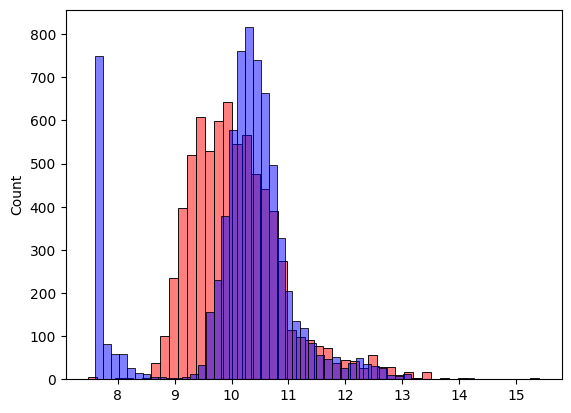

In [98]:
sns.histplot(y_pred, color='red', alpha =0.5, bins=50)
sns.histplot(y_train, color='blue', alpha =0.5, bins=50)

## 2.9 Root Mean Square Error
Used for validating the performance of model

In [99]:
def rmse(y, y_pred):
    # error = y - y_pred
    # se = error ** 2
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [100]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

In [101]:
y

[10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [102]:
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

## 2.10 Validating the model (Computing RMSE in Validation data)

In [103]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [104]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)

    #Extracting nupy array
    X = df_num.values
    return X
    

In [105]:
#Training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Evaluation
rmse(y_val, y_pred)

np.float64(0.761653099130156)

## 2.11 Feature Engineering

In [106]:
df_train.year

0       2008
1       2012
2       2016
3       1991
4       2017
        ... 
7145    2015
7146    2015
7147    2015
7148    2014
7149    2017
Name: year, Length: 7150, dtype: int64

In [107]:
df_train.year.max()

np.int64(2017)

In [108]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [109]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)

    #Extracting nupy array
    X = df_num.values
    return X
    

In [110]:
X_train = prepare_X(df_train)

In [111]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [112]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [113]:
#Training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Evaluation
rmse(y_val, y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

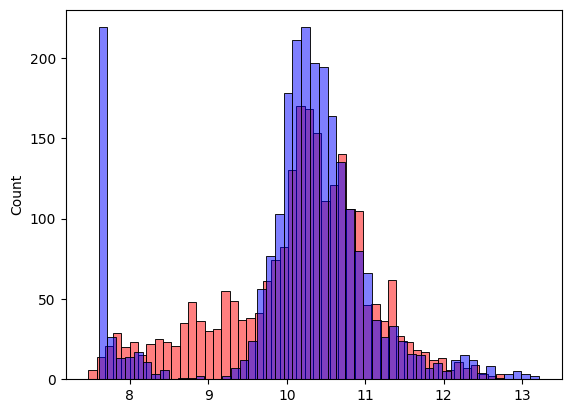

In [114]:
sns.histplot(y_pred, color='red', alpha =0.5, bins=50)
sns.histplot(y_val, color='blue', alpha =0.5, bins=50)

## 2.12 Categorical Variables

Categorical variables are typically represented as strings, and pandas identifies them as object types. However, some variables that appear to be numerical may actually be categorical (e.g., the number of doors a car has). All these categorical variables need to be converted to a numerical form because ML models can interpret only numerical features. It is possible to incorporate certain categories from a feature, not necessarily all of them. This transformation from categorical to numerical variables is known as One-Hot encoding.

In [115]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [116]:
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [117]:
df_train.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

In [118]:
# way of encoding such categorical variables is to represent them with a bunch of binary columns – so called one-hot encoding. 
# For each value we have a different column.
df_train.number_of_doors == 2

0        True
1       False
2       False
3       False
4       False
        ...  
7145     True
7146     True
7147    False
7148    False
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

In [119]:
# df_train.number_of_doors.fillna(0)
df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
df_train['num_doors_3'] = (df_train.number_of_doors == 2).astype('int')
df_train['num_doors_4'] = (df_train.number_of_doors == 2).astype('int')

In [120]:
# Above operation can be automated with string replacement
'num_doors_%s' %4

'num_doors_4'

In [121]:
# Loop for string replacement
for v in [2,3,4]:
    df_train['num_doors_%s' %v] = (df_train.number_of_doors == v).astype('int')

In [122]:
# Deleting cuz Efficieny can be increased further
for v in [2, 3, 4]:
    del df_train['num_doors_%s' %v]

In [123]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df['year']
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int')
        features.append('num_doors_%s' %v)

    df_num = df[features]
    df_num = df_num.fillna(0)

    # Extracting numpy array
    X = df_num.values
    return X

In [124]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [125]:
#Training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Evaluation
rmse(y_val, y_pred)  # Slight improvement, almost negligible

np.float64(0.515799564150169)

In [126]:
df.make.value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [127]:
df.make.nunique()

48

In [128]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [129]:
df.make.value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object', name='make')

In [130]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [131]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df['year']
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int')
        features.append('num_doors_%s' %v)

    for v in makes:
        df['make_%s' %v] = (df['make'] == v).astype('int')
        features.append('make_%s' %v)

    df_num = df[features]
    df_num = df_num.fillna(0)

    # Extracting numpy array
    X = df_num.values
    return X

In [132]:
#Training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Evaluation
rmse(y_val, y_pred) # Slight improvement

np.float64(0.5076038849556795)

In [133]:
 df.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [134]:
# Adding more categorical variables
categorical_variables = [ 'make' , 'engine_fuel_type', 'transmission_type','driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

categories = {}

for category in categorical_variables:
    categories[category] = list(df[category].value_counts().head().index)

In [135]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [136]:
print(categories.items)

<built-in method items of dict object at 0x7233513cddc0>


In [137]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df['year']
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int')
        features.append('num_doors_%s' %v)

    for category, values in categories.items():
        for value in values:
            df['%s_%s' %(category,value)] = (df[category] == value).astype('int')
            features.append('%s_%s' %(category,value))

    df_num = df[features]
    df_num = df_num.fillna(0)

    # Extracting numpy array
    X = df_num.values
    return X

In [138]:
#Training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Evaluation
rmse(y_val, y_pred) # Performance of model degraded after including more features

np.float64(23.019020704791835)

## 2.13 Regularization

If the feature matrix has duplicate columns (or columns that can be expressed as a linear combination of other columns), it will not have an inverse matrix. But, sometimes this error could be passed if certain values are slightly different between duplicated columns.

So, if we apply the normal equation with this feature matrix, the values associated with duplicated columns are very large, which decreases the model performance. To solve this issue, one alternative is adding a small number to the diagonal of the feature matrix, which corresponds to regularization.

This technique works because the addition of small values to the diagonal makes it less likely to have duplicated columns. The regularization value is a hyperparameter of the model. After applying regularization the model performance improved.

In [140]:
# You see here 2nd and 3rd columns are identical
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]
X = np.array(X)

In [143]:
XTX = X.T.dot(X)
XTX # 2nd & 3rd columns are same, so inverse doesn't exist

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [145]:
XTX_inv = np.linalg.inv(XTX)
# LinAlgError: Singular matrix

LinAlgError: Singular matrix

In [146]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]
 
X = np.array(X)
y = [1, 2, 3, 1, 2, 3]
 
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [147]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.92646538e-02, -1.54615164e+05,  1.54615121e+05],
       [-1.54615170e+05,  3.51843724e+13, -3.51843721e+13],
       [ 1.54615129e+05, -3.51843721e+13,  3.51843718e+13]])

In [ ]:
w = XTX_inv.dot(X.T).dot(y)
w

In [ ]:
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1.0000001],
    [2, 1.0000001, 1.0001]
]
 
XTX = np.array(XTX)
np.linalg.inv(XTX)